Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise04/exercise04.ipynb)

# Exercise 4 (in Two Parts)

# The Data Viz Part

Next week is Data Visualization week. This is one of my favorite topics, in part because we get to look at lots of pictures, and in part because it provides an excuse for some very lighthearted competition.

In prep for next week, part of your exercise is to find an example of either an _excellent_ or _terrible_ data visualization. We will vote on the best (and worst) in each category, and the winner gets a small (tasty) prize.

Please find an example of a data visualization that is either _very effective_ or _terribly ineffective_ in communicating an interesting finding from data. Here are a few ground rules:
- One figure only: We should be able to see the whole thing at once on a projector screen.
- Static images only: If you find something dynamic or interactive that you _must_ submit, please take a screenshot.
- Do the reading first: Tufte will give you some ideas for what makes visualizations good or bad
- No examples from Tufte. Gotta work a little bit.

Please either paste a link to your image in the text cell below (can you figure out how to get markdown to display the image?) or add an image file to your PR.
- Please label it clearly as "good" or "bad" so we know which race you're in.
- Please write a couple bullets about why it's good or bad. This is your pitch (we can haggle about it in class, too.)

### [**Bad** example](https://www.good.is/infographics/america-s-richest-counties-and-best-educated-counties):
- Trying to show too much
- Unclear what is meant by the final product/color; original data is obfuscated
- Difficult to show relationship between variables, which is (theoretically) the point of this map
- Not friendly to colorblind vision
- Map is not necessarily the best way to display this information
- Would need to be accompanied by a table to be truly useful; cannot stand on its own

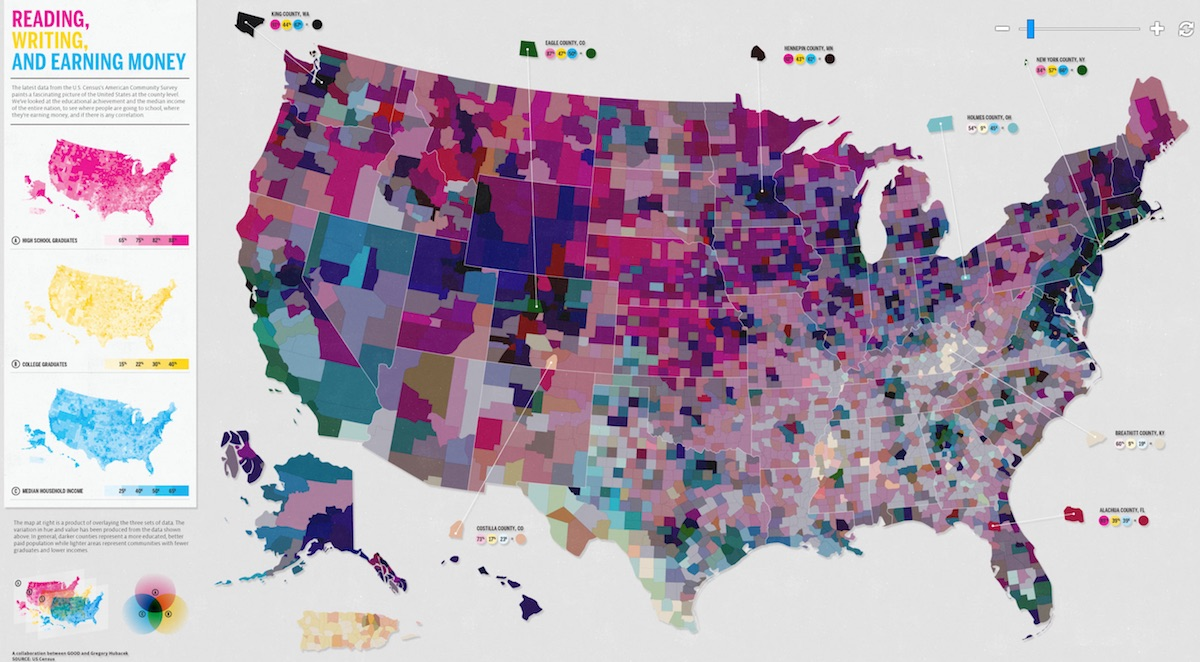

# The Programming Part

## Problem

In [Exercise 3](https://github.com/ncsg/ursp688y_sp2024/blob/main/exercises/exercise03/exercise03.ipynb), you examined how many affordable housing units available to households up to 60% AMI were planned within each ward in Washington, D.C.

The bonus problem was to calculate which wards were producing a _disproportionately_ large and small number of housing units given their populations.

This week, please reproduce this analysis, <ins>including</ins> the bonus part, using some of your new data loading, joining, and module-building skills.

Please write a program that:

- Loads the affordable housing project data from `affordable_housing.csv`
- Loads the ward populations from `wards_from_2022.csv`
- Joins the population data to the affordable housing data
- Calculates which wards are producing disproportionately large and small number of housing units given their populations
- Completes all of this data loading and processing within a function (or a series of functions called by a single main function)
- Stores that function (and any related functions) in a module
- Calls the main function in the exercise notebook to return table or other summary or results

## Data

CSVs for both required data tables are included on GitHub at `exercises/exercise04`.

Please consult the city's database of [affordable housing](https://opendata.dc.gov/datasets/DCGIS::affordable-housing/about) projects and [ward demographic](https://opendata.dc.gov/datasets/DCGIS::wards-from-2022/about) data.

Bonus: find, download, and use more recent ward population data. (Remember to include it in your PR.) My cursory search found data as late as 2022.

## New instructions for submitting a PR with multiple files

Because you'll be working with multiple files, PRs become _slightly_ more complicated, so we're graduating to a new 'mini-repository' pattern:
- Make a new folder in `exercises/exercise04` with your last name (just like the suffix for your notebook file)
- Upload your notebook file, also appropriately named, into that folder
- Upload any other files you make/use, including `.py` and `.csv` files, into that folder, so everything is together in the same place

Ultimately, this will look a bit like this:
```
── exercises
    ├── exercise04
        ├── harvey
            ├── exercise04_harvey.ipynb
            ├── affordable_housing_calcs.py
            ├── affordable_housing.csv
            └── wards_from_2022.csv
```

**NOTE:** Yes, I realize this is a bit redundant because everyone will have copies of the same CSV files. This would never be a good idea for production coding--we would have one `data` directory, and everyone would draw from the same data. However, there are two reasons for all these copies in this case:
1. It's good practice to build a repository with all the parts your code needs to run.
    - In later weeks, when you  _don't_ all have the same data, it won't seem as redundant.
3. Having everything in one folder will make it easy for me to run your code on my computer.

## Hints
- You may want to join the population data _after_ summarizing the affordable housing data (i.e., join populations to sums of units). However, I could also see an approach where you join at the beginning, then aggregate the population column with a method called `first`



In [ ]:
# Connect to Google Drive:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set working directory:

import os
wd_path = '/content/drive/MyDrive/ursp688y_shared_data'
os.chdir(wd_path)

In [ ]:
# Import everything else we'll need:

import pandas as pd
housing_projects = pd.read_csv('affordable_housing.csv')
ward_demographics = pd.read_csv('wards_from_2022.csv')

In [ ]:
# Import the module, which is where the functions are housed:

import affordable_housing_calcs_sanford_v2
%load_ext autoreload
%autoreload 2

# Call the function with the dataframes created in cell 3:
affordable_housing_calcs_sanford_v2.affordable_proportion(housing_projects, ward_demographics)

,Ward,Population,Housing units,Total affordable units <= 60% AMI,Affordable proportion of total units (%),Affordable units per 100 people
0,Ward 1,85285,45694,1457,3.188602,1.708390
1,Ward 2,89485,53217,260,0.488566,0.290551
2,Ward 3,85301,44109,444,1.006597,0.520510
3,Ward 4,84660,34650,632,1.823954,0.746515
4,Ward 5,89617,41794,2252,5.388333,2.512916
5,Ward 6,84266,52768,2434,4.612644,2.888472
6,Ward 7,85685,38968,2310,5.927941,2.695921
7,Ward 8,85246,39164,4292,10.959044,5.034840
